# Ch03 Triple Barriers(A233740)

In [264]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime
from adv_finance import bars, labeling, utils

from matplotlib.patches import Rectangle
import  matplotlib.dates as mdates


In [4]:
%load_ext autoreload 
%autoreload 2


plt.style.use('seaborn-talk')
plt.style.use('bmh')
pd.set_option('display.max_rows', 100)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [448]:
TRADE_A233740_DRB = pd.read_parquet('/nfs/data/interim_2018/TRADE_A233740_DRB.parq')
df = TRADE_A233740_DRB[['open', 'high', 'low', 'close', 'vol']].drop_duplicates()
df = df.loc[~df.index.duplicated(keep='first')]
close = df

In [459]:
daily_vol = utils.get_daily_vol(close[['close']])
threshold = daily_vol['close'].mean() * 0.5
cusum_events = labeling.cusum_filter(close[['close']], threshold)
vertical_barriers = labeling.add_vertical_barrier(t_events=cusum_events, close=df[['close']], num_days=1)

In [471]:
pt_sl = [1, 2]
min_ret = 0.005
triple_barrier_events = labeling.get_events(close=df['close'],
                                            t_events=cusum_events,
                                            pt_sl=pt_sl,
                                            target=daily_vol['close'],
                                            min_ret=min_ret,
                                            num_threads=1,
                                            vertical_barrier_times=vertical_barriers,
                                            side_prediction=None)


/nfs/code/adv_finance/adv_finance/labeling/labeling.py:111: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  target = target.loc[t_events]


In [479]:
def plot_barrier(d0, df, triple_barrier_events): 
    df0 = df.loc[d0]
    triple_barrier_events0 = triple_barrier_events.loc[d0]
    
    
    fig = plt.figure(figsize=(30, 10))
    ax = fig.add_subplot(111)

    plt.title('Triple barriers over the prices')
    plt.plot(df0.index.values, df0.close.values, label='raw_prices', ls='--', color='black')


    # Draw barrier region 
    for i in triple_barrier_events0.itertuples(): 
        t0, t1, trgt = i.Index, i.t1, i.trgt
        t1 = min(t1, pd.Timestamp(f"{d0} 15:30"))

        x0 = mdates.date2num(t0)
        x1 = mdates.date2num(t1)
        w = x1 - x0 

        y0 = df0.loc[t0].close * (1 - trgt)
        y1 = df0.loc[t0].close * (1 + trgt)
        h = y1 - y0

        rect = Rectangle((x0, y0), w, h, color='black', alpha=0.05)
        ax.add_patch(rect)

        df1 = df0.loc[[t0, t1]].dropna()

        plt.plot(df1.index.values, df1.close.values, label='triple barrier', ls='--', color='red')
        if df1.shape[0] >= 2:
            plt.scatter(df1.index.values[1], df1.close.values[1], marker='o', linewidths=5, color='red')

    plt.show()


/opt/conda/envs/python372/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


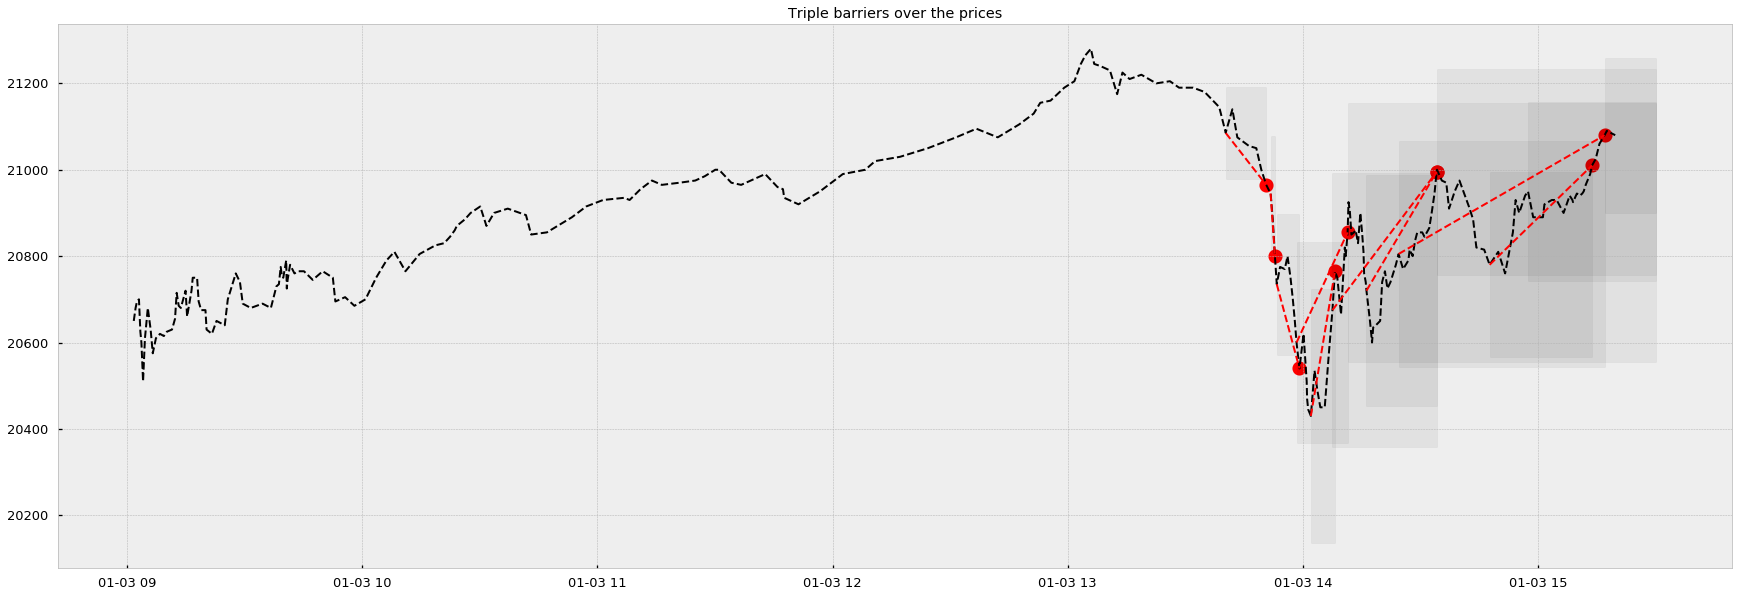

In [480]:
plot_barrier('2018-01-03', df, triple_barrier_events)

/opt/conda/envs/python372/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


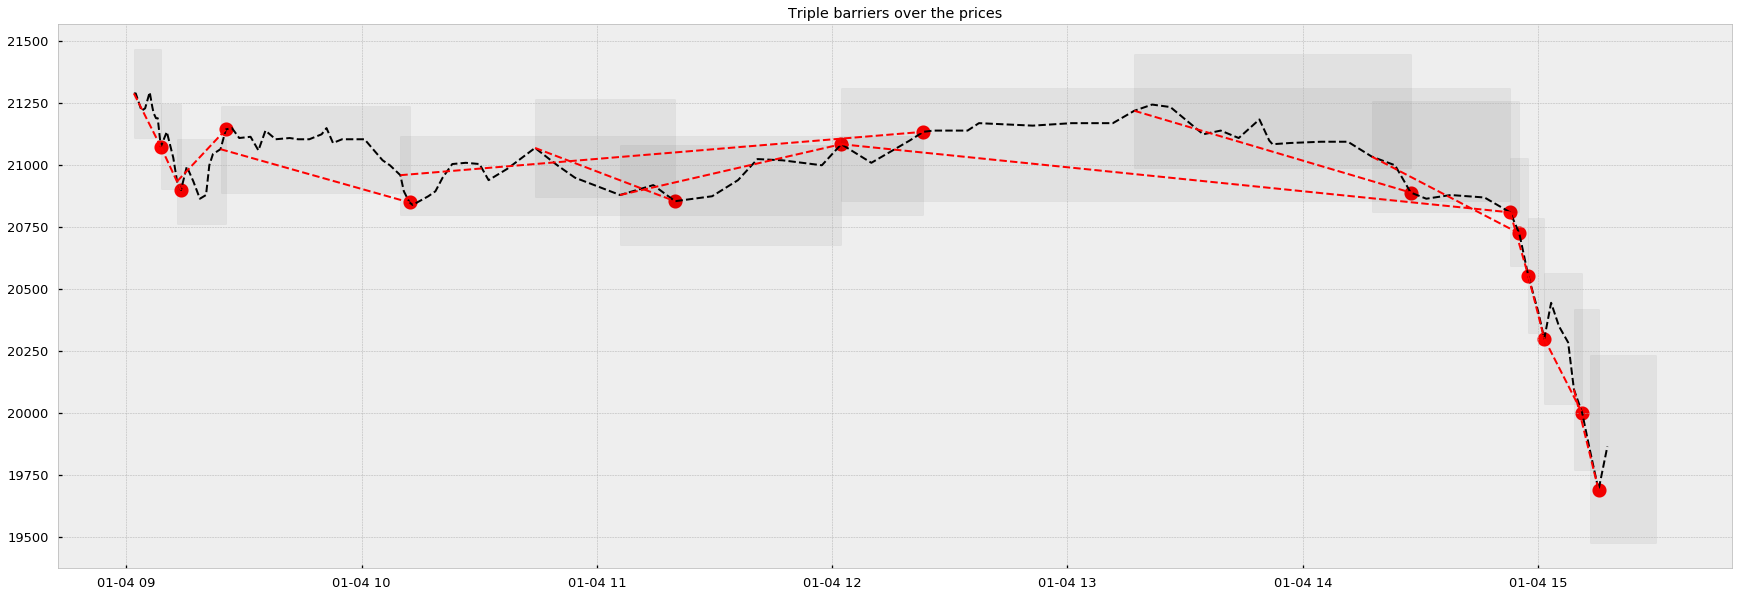

In [481]:
plot_barrier('2018-01-04', df, triple_barrier_events)

/opt/conda/envs/python372/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


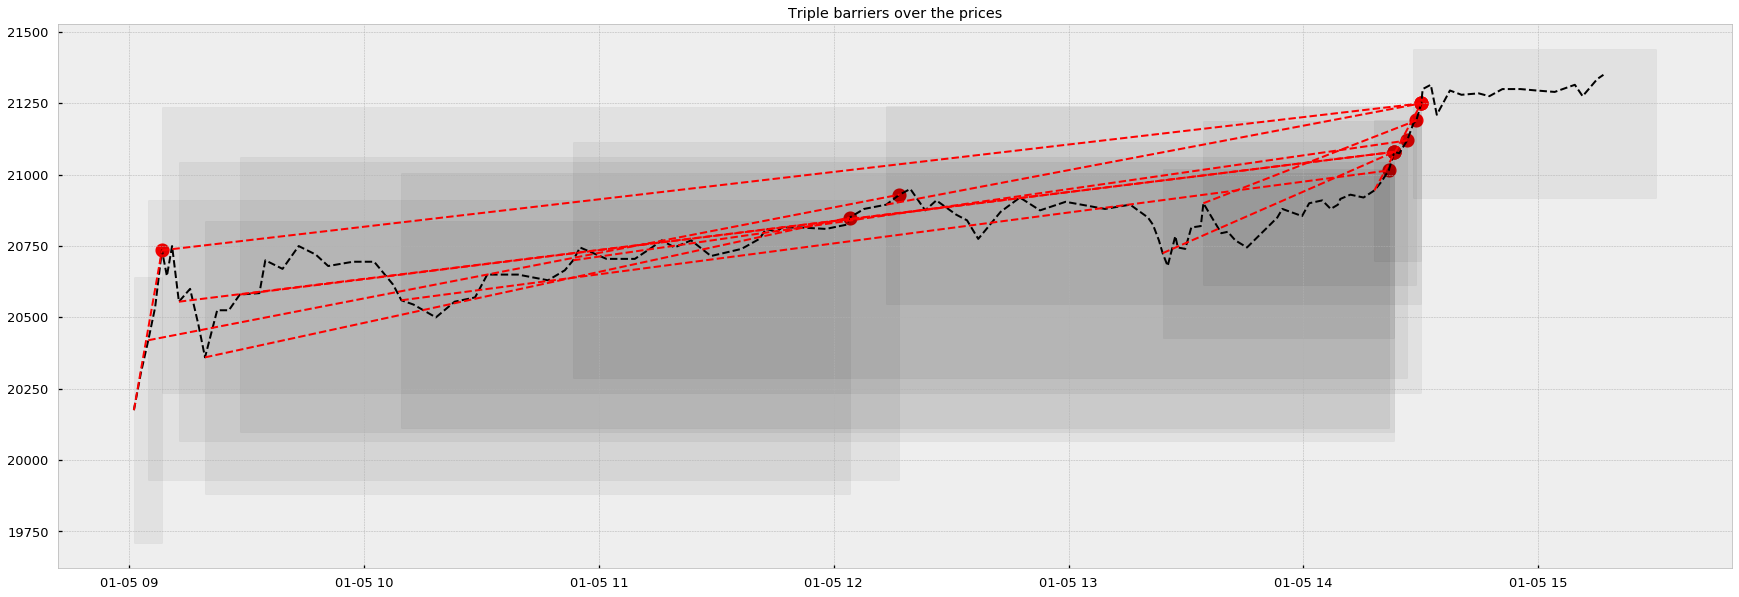

In [482]:
plot_barrier('2018-01-05', df, triple_barrier_events)

# APPENDIX